In [1]:
from torchvision import models 

In [2]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [3]:
# for creating teh oobject of alexnet we have to instantiate the object 
alexnet = models.AlexNet()

In [4]:
# the above type of instantiation of the model just loads the architecture for 
#loading the pretrained weights we have to load itindirectly otherwise we have to train network from a scratch 
# 

# for loading in the arguments of the model we have to pass argument as pretrained = True 
# this will create the instance with the weights initalized to the values on which it was trained originally 

resnet = models.resnet101(pretrained = True)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /home/som/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:30<00:00, 5.88MB/s]


In [5]:
# to getting the info about overall architecture 
resnet 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
# before passing the images through neural networks we have to preprocess them 
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256), 
    transforms.CenterCrop(224), 
    transforms.ToTensor(), 
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225]
    )
])

In [16]:
from PIL import Image 
img = Image.open('/home/som/Pictures/baby.png').convert('RGB')


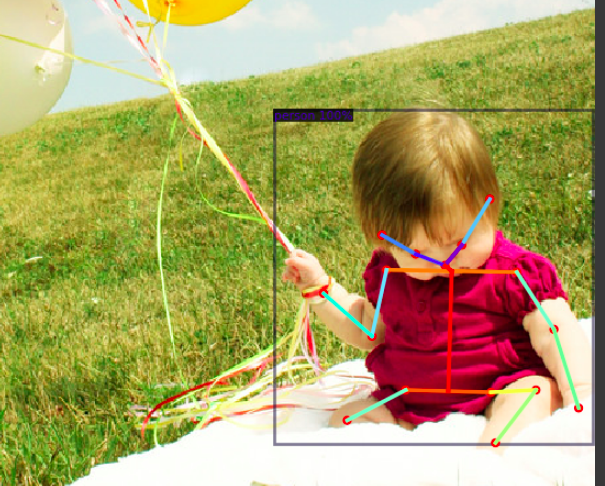

In [17]:
img

In [19]:
img_5 = preprocess(img)

In [20]:
img_5

tensor([[[ 1.7180,  1.6838,  1.6667,  ...,  1.1015,  1.1015,  1.0673],
         [ 1.6495,  1.6153,  1.5810,  ...,  1.1187,  1.1700,  1.1015],
         [ 1.5468,  1.5125,  1.4783,  ...,  1.0844,  1.1187,  1.1187],
         ...,
         [-0.3027, -0.2856, -0.0287,  ...,  2.2147,  2.2147,  2.2147],
         [-0.3541, -0.3369, -0.1486,  ...,  2.2147,  2.2147,  2.2147],
         [-0.4226, -0.4054, -0.1999,  ...,  2.2318,  2.2318,  2.2318]],

        [[ 2.0434,  2.0434,  2.0609,  ...,  1.1681,  1.2031,  1.1331],
         [ 2.0434,  2.0259,  2.0259,  ...,  1.2381,  1.2906,  1.1856],
         [ 2.0259,  2.0259,  2.0259,  ...,  1.2031,  1.2206,  1.2556],
         ...,
         [ 0.8004,  0.8529,  0.9055,  ...,  2.4286,  2.4286,  2.4286],
         [ 0.9230,  0.9230,  0.7654,  ...,  2.4286,  2.4286,  2.4286],
         [ 0.8004,  0.5728,  0.5903,  ...,  2.4286,  2.4286,  2.4286]],

        [[ 2.1520,  2.1694,  2.1520,  ..., -0.3753, -0.2881, -0.3055],
         [ 2.1520,  2.1694,  2.1520,  ..., -0

In [21]:
import torch 


In [22]:
batch_5 = torch.unsqueeze(img_5, 0 )


In [23]:
# the process of running the trained model on the new data we in deep learning we call in inference 
# in order for doing inference we have to put our network in eval mode 

In [24]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [25]:
out = resnet(batch_5)

/home/som/.local/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [26]:
out

tensor([[-2.1528e-01, -3.1665e-01, -1.6709e-01, -2.2919e+00, -1.7790e+00,
         -1.0882e+00, -1.6059e+00, -4.1819e-01,  3.4989e-01, -5.0361e-01,
         -2.2134e+00, -1.2086e+00, -1.5163e+00, -8.6580e-01, -1.2982e+00,
         -8.3023e-01,  6.6721e-01, -1.0076e+00,  2.9557e-01, -1.6376e+00,
         -1.7049e+00, -5.5740e-01, -1.7610e+00, -7.5355e-01, -5.2196e-01,
         -6.4423e-01,  7.7779e-01,  2.0992e+00, -1.1427e+00, -1.9549e+00,
          8.6237e-01, -2.8361e+00, -7.2606e-01, -3.9582e+00, -2.6293e+00,
         -1.1778e+00, -9.1177e-02, -1.5983e+00, -1.8626e+00, -1.7432e+00,
          9.6705e-01, -1.4580e+00, -1.3633e+00, -1.3549e+00, -2.9110e-01,
         -1.9408e+00, -3.2452e-01, -7.4777e-01, -2.5315e+00, -2.0830e+00,
         -6.7853e-01, -4.6495e-01, -4.8476e-01,  2.0327e-01, -2.0536e+00,
         -2.1852e+00, -2.5616e+00, -3.2932e-01, -7.4355e-01, -6.5627e-01,
         -5.1804e-01, -3.9492e+00, -3.5193e+00, -1.9870e+00, -2.9327e+00,
         -3.3414e+00, -3.5729e+00, -3.

In [28]:
# read the labels from the imagenet classes file and determining what's our image is 

In [29]:
_,index = torch.max(out, 1 )

In [32]:
# getting the prediction precentage 
percentage = torch.nn.functional.softmax(out, dim = 1)[0] * 100 
percentage[index[0]].item()

66.04014587402344

In [33]:
_

tensor([13.5115], grad_fn=<MaxBackward0>)

In [35]:
# for sorting the tensor in the descending order 
_, indices = torch.sort(out, descending=True)

In [37]:
[(percentage[idx].item()) for idx in indices[0][:5]]

[66.04014587402344,
 32.0868034362793,
 0.6490508317947388,
 0.1674778312444687,
 0.10594280809164047]

In [41]:
#Creating the instance of resnet generator

netG = ResNetGenerator()
# further notebook is done on colab since reuiring downloading lots of data and other concurrent stuff needed 

NameError: name 'ResNetGenerator' is not defined